In [1]:
import numpy as np
import emcee
import corner
import matplotlib.pyplot as plt


In [3]:
data = np.loadtxt("fgas_spt.txt")

In [4]:
def ln_likelihood(theta, x, y, yerr):
    f0, f1 = theta
    model = f0 * (1 + f1 * x)
    inv_sigma2 = 1.0 / (yerr ** 2)
    return -0.5 * np.sum((y - model) ** 2 * inv_sigma2 - np.log(inv_sigma2))

In [5]:
def ln_prior(theta):
    f0, f1 = theta
    if 0 < f0 < 0.5 and -0.5 < f1 < 0.5:
        return 0.0
    return -np.inf

In [6]:
def ln_posterior(theta, x, y, yerr):
    lp = ln_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + ln_likelihood(theta, x, y, yerr)

In [7]:
ndim = 2  # Number of parameters in the model.
nwalkers = 100  # Number of MCMC walkers.
nsteps = 1000  # Number of MCMC steps.

In [8]:
# Initialize the walkers.
pos = [np.array([np.random.uniform(0, 0.5), np.random.uniform(-0.5, 0.5)]) for i in range(nwalkers)]

In [9]:
# Set up the MCMC sampler.
sampler = emcee.EnsembleSampler(nwalkers, ndim, ln_posterior, args=(data[:,0], data[:,1], data[:,2]))

# Run the MCMC sampler.
sampler.run_mcmc(pos, nsteps, progress=True);

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 214.34it/s]


In [10]:
# Extract the samples.
samples = sampler.chain[:, :, :].reshape((-1, ndim))

ValueError: too many values to unpack (expected 2)

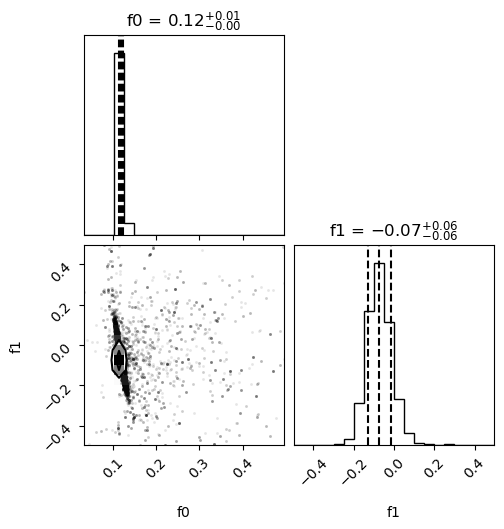

In [14]:
# Plot the corner plot.
fig = corner.corner(samples, labels=["f0", "f1"], quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 12})
# Print the best-fit values and credible intervals.
f0_mcmc, f1_mcmc = np.percentile(samples, [50, 50 + 34.1, 50 - 34.1], axis=0)
print("f0 = {:.3f} +{:.3f}/-{:.3f}".format(f0_mcmc[0], f0_mcmc[1] - f0_mcmc[0], f0_mcmc[0] - f0_mcmc[2]))
print("f1 = {:.3f} +{:.3f}/-{:.3f}".format(f1_mcmc[0], f1_mcmc[1] - f1_mcmc[0], f1_mcmc[0] - f1_mcmc[2]))
